<img src="img/title_01.png">

<img src="img/title_notebook01.jpg">

# Hello, FedGIS

In [1]:
1+2

3

In [2]:
import arcgis

In [3]:
gis = arcgis.gis.GIS(url="https://ndirt.maps.arcgis.com", username="ANieto_ndirt")

Enter password: ········


In [4]:
m = gis.map('Washington DC')
m

<Item title:"Federal_Buildings_Brutalist_Architecture" type:Feature Layer Collection owner:ANieto_ndirt>
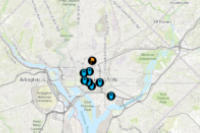

In [5]:
items = gis.content.search("Federal Buildings", item_type="feature layer")
for item in items:
    display(item)

In [7]:
federal_buildings = items[0]

m2 = gis.map('Washington DC', zoomlevel=12)
m2.basemap = "gray-vector"

display(m2)

In [8]:
m2.add_layer([federal_buildings])

## Analysis

#### Setup

In [9]:
import time

def visualize_find_routes_results(map_widget, find_routes_result, stops_layer, zoom_level):
    # The map widget
    m = map_widget
    m.basemap = 'dark-gray-vector'
    # The find_routes result
    result = find_routes_result
    
    # 1. Parse the find-routes analysis results
    # Extract the output data from the analysis results
    # Store the output points and lines in pandas dataframes
    lines_df = result.output_routes.df
    lines_fset = arcgis.features.FeatureSet.from_dataframe(lines_df)
    
    # 2. Define the map symbology
    # Allocation lines
    allocation_line_symbol_1 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [255,255,255,153], 'width': 0.7}

    allocation_line_symbol_2 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,255,197,39], 'width': 3}

    allocation_line_symbol_3 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,197,255,39], 'width': 5}
    
    allocation_line_symbol_4 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,92,230,39], 'width': 7}
    
    time.sleep(1.5)
    m.draw(shape=result.output_routes, symbol=allocation_line_symbol_4)
    m.draw(shape=result.output_routes, symbol=allocation_line_symbol_2)
    m.draw(shape=result.output_routes, symbol=allocation_line_symbol_1)
    
    m.add_layer(stops_layer)
    
    m.zoom = zoom_level

In [10]:
federal_architecture_tour_route = arcgis.network.analysis.find_routes(federal_buildings.layers[0].query(),
                                                                      reorder_stops_to_find_optimal_routes=True,
                                                                      travel_mode="Walking Time",
                                                                      impedance="Walk Time",
                                                                      gis=gis)

WARNING 030194: Data values longer than 500 characters from input field [Stops::Name] are truncated.
Location "Department of Transportation" in "Stops" is on a soft-restricted network element.
Network elements with avoid-restrictions are traversed in the output (restriction attribute names: "Avoid Private Roads").



### Brutalist Architectural Tour of DC

In [7]:
arcgis.network.analysis.find_routes?

In [ ]:
federal_architecture_tour_route = arcgis.network.analysis.find_routes(federal_buildings.layers[0].query(),
                                                                      reorder_stops_to_find_optimal_routes=True,
                                                                      travel_mode="Walking Time",
                                                                      impedance="Walk Time",
                                                                      gis=gis)

In [11]:
federal_architecture_tour_route.output_directions.df

,ArriveTime,DriveDistance,ElapsedTime,ObjectID,RouteName,Shape_Length,SubItemType,Text,Type,SHAPE
0,-2209161600000,0.000000,0.000000,1,Convention Center - Department of Transportation,0.000000,1,Start at Convention Center,18,{}
1,-2209161600000,0.099323,1.918121,2,Convention Center - Department of Transportation,0.001843,1,Go west on L St NW toward 9th St NW,2,"{'paths': [[[-77.02217727899995, 38.9041700000..."
2,-2209161600000,0.554670,10.711760,3,Convention Center - Department of Transportation,0.008040,1,Turn left on 9th St NW,5,"{'paths': [[[-77.02401999999995, 38.9041700000..."
3,-2209161600000,0.054166,1.046056,4,Convention Center - Department of Transportation,0.001005,1,Turn right on E St NW,6,"{'paths': [[[-77.02396999999996, 38.8961300000..."
4,-2209161600000,0.000000,0.000000,5,Convention Center - Department of Transportation,0.000000,1,"Arrive at Federal Bureau of Investigation, on ...",1,{}
5,-2209161600000,0.000000,0.000000,6,Convention Center - Department of Transportation,0.000000,1,Depart Federal Bureau of Investigation,18,{}
6,-2209161600000,0.251482,4.856613,7,Convention Center - Department of Transportation,0.004665,1,Continue west on E St NW,2,"{'paths': [[[-77.02497482299998, 38.8961300000..."
7,-2209161600000,0.107612,2.078205,8,Convention Center - Department of Transportation,0.001560,1,Turn left on 13th St NW,5,"{'paths': [[[-77.02963999999997, 38.8961300000..."
8,-2209161600000,0.067474,1.303053,9,Convention Center - Department of Transportation,0.001155,1,Turn right,6,"{'paths': [[[-77.02962999999994, 38.8945700000..."
9,-2209161600000,0.000000,0.000000,10,Convention Center - Department of Transportation,0.000000,1,"Arrive at Ronald Reagan Building, on the right",1,{}


In [12]:
m3 = gis.map('Washington DC', zoomlevel=11)
m3

In [13]:
visualize_find_routes_results(m3, federal_architecture_tour_route, federal_buildings, zoom_level=13)

## Results
- Query on a table
- Show on the map

In [ ]:
routes_layer = architecture_route['routes_layer']
assigned_stops_layer = architecture_route['assigned_stops_layer']

In [ ]:
df = assigned_stops_layer.query().df
df[['FromPrevDistance', 'FromPrevTravelTime', 'description', 'pic_url', 'thumb_url']]

### TODO - Add images, animation of stops

In [ ]:
m.add_layer(routes_layer)
m.add_layer(assigned_stops_layer)